### Scikit-learn을 이용한 머신러닝 학습 가이드!

- scikit-learn(sklearn)을 완전히 사용해서 end-to-end로 학습시키는 코드를 완성해봅니다!

- 너무나 유명한 california house pricing 데이터를 이용하여 회귀분석 예제 코드를 만들어봅시다.


> Data Load - Data Preprocessing - Fit - Evalution - Predict

In [ ]:
!pip install sklearn

### Data Load

In [ ]:
# Hands-on!!
from sklearn.datasets import fetch_california_housing

X = fetch_california_housing(as_frame=True).data # JSON(dictionary) / as_frame (dataframe으로 바꿈)
# data X
y = fetch_california_housing(as_frame=True).target # y : target, 예측 대상

# fetch_california_housing(as_frame=True).frame # X + y

print(X.shape, y.shape)

(20640, 8) (20640,)


### Data Preprocessing + EDA

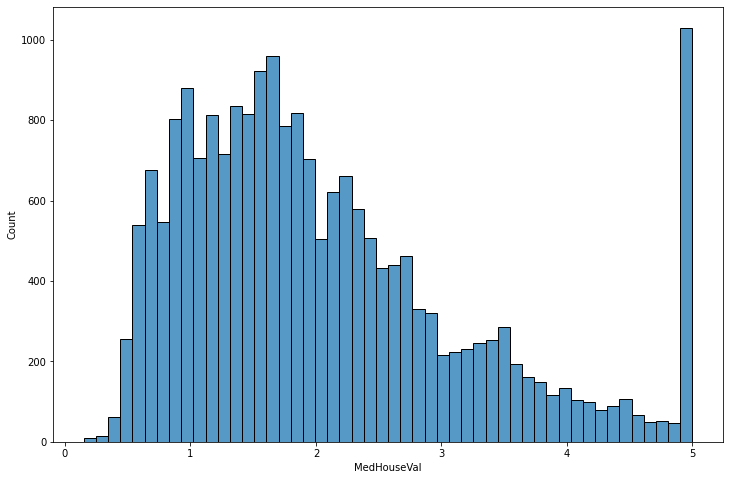

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 결측치 확인
# X.info()
X[X.isnull().any(axis=1)]

# 2. dtype이 object인 column이 있는지 확인 --? categorical feature을 확인하기 위해!

# 3. target distribution 예측 데이터 확인하는 작업을 해야 데이터에 대한 전반적인 것을 확인할 수 있음
plt.figure(figsize=(12,8))
sns.histplot(y, bins = 50)
plt.show()
# 5 넘는걸 잘라서 5 안으로 해줘서 데이터가 저렇게 나옴.

In [ ]:
## Train-test Split
from sklearn.model_selection import train_test_split

# return되는 결과 암기! / 트테트테
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
# test_size = 0.2 -> train test 20% 사용 / random_state 랜덤 값이 고정이 됨
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


### Training (Fit)

In [ ]:
# 1. 사용할 함수를 불러옵니다.
from sklearn.linear_model import LinearRegression
from lightgbm.sklearn import LGBMRegressor
# from sklearn.linear_model import Lasso


# 2. 사용할 함수의 객체를 생성합니다.
reg = LinearRegression() # LinearRegression을 사용하겠다.
reg2 = LGBMRegressor()


# 3. 학습
reg.fit(X_train, y_train) ### Regression : Supervised learning 따라서, y 정답이 있어야 함 --> parameter update
reg2.fit(X_train, y_train)

LGBMRegressor()

### Evaluation

In [ ]:
# 학습 결과를 확인 (평가 지표.)

from sklearn.metrics import mean_squared_error, r2_score

pred = reg.predict(X_train) # y_hat / numpy array
pred2 = reg2.predict(X_train)

print('---Linear Regression ---')
print('MSE : % .4f' % mean_squared_error(y_train, pred))
print( 'R2 : % .4f' % r2_score(y_train, pred))
print('\n\n ---LightGBM---')
print('MSE : % .4f' % mean_squared_error(y_train, pred2))
print( 'R2 : % .4f' % r2_score(y_train, pred2))

---Linear Regression ---
MSE :  0.5179
R2 :  0.6126


 ---LightGBM---
MSE :  0.1562
R2 :  0.8831


### Prediction

In [ ]:
result = reg.predict(X_test)
result2 = reg2.predict(X_test)

print('---Linear Regression ---')
print('MSE : % .4f' % mean_squared_error(y_test, result))
print( 'R2 : % .4f' % r2_score(y_test, result))

print('\n\n ---LightGBM---')
print('MSE : % .4f' % mean_squared_error(y_test, result2))
print( 'R2 : % .4f' % r2_score(y_test, result2))

---Linear Regression ---
MSE :  0.5559
R2 :  0.5758


 ---LightGBM---
MSE :  0.2148
R2 :  0.8360


In [ ]:
reg.coef_ # coefficient 가중치(계수) 따로 보기
reg.intercept_ # 절편

-37.02327770606412

### 현재 데이터는 튜토리얼을 위해 가공된 데이터 샘플임<br><br>실제 데이터 머신러닝 과정에서는 <br>데이터에 대한 이해, 머신러닝 문제 정의, 데이터 수집 및 정제(데이터 정형화), 탐색적 데이터 분석, feature engineering, 예측 모델 개발 및 적용<br> 모든 단계를 고려하여 머신러닝 모델을 학습해야함.